# Statistical Analysis

## Purpose
This notebook focuses on validating the insights obtained from the Exploratory Data Analysis (EDA) through statistical methods. The goal is to identify variables that are statistically significant and justify their inclusion in the predictive models. This step ensures that our data-driven decisions are backed by evidence and not random patterns.

## Steps
1. **Hypothesis Testing**:
   - Perform statistical tests (e.g., t-tests, ANOVA) to validate relationships between variables and the target variable (`quality`).
   - Evaluate categorical variables using chi-square tests where applicable.

2. **Correlation Analysis**:
   - Validate and refine the relationships identified during the EDA.
   - Highlight statistically significant positive and negative correlations.

3. **Feature Importance**:
   - Identify and rank variables based on their statistical relevance for modeling.
   - Justify the selection of features for machine learning algorithms.

4. **Observations**:
   - Document findings and their potential impact on model performance.
   - Summarize variables that should be included in the modeling phase.

## Outcome
By the end of this notebook, we will have:
- A statistically sound set of features for model building.
- A deeper understanding of the relationships between key variables and the target variable.


## Import necessary libraries

In [75]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

## Load cleaned dataset (from the first notebook)

In [77]:
df = pd.read_csv('../data/cleaned_dataset.csv')

## 1. Hypothesis Testing

### 1.1 (ANOVA for continuous variables against the target variable 'quality')

In [80]:
# Group data by 'quality'
grouped_data = [df[df['quality'] == q] for q in df['quality'].unique()]

# Perform ANOVA for numerical variables
numerical_cols = df.select_dtypes(include=['float', 'int']).columns.drop('quality')
anova_results = {}
for col in numerical_cols:
    f_stat, p_value = f_oneway(*[group[col] for group in grouped_data])
    anova_results[col] = p_value

# Display results
anova_results = pd.DataFrame(list(anova_results.items()), columns=['Variable', 'P-Value'])
anova_results['Significant'] = anova_results['P-Value'] < 0.05
print("\nANOVA Results:\n")
print(anova_results)


ANOVA Results:

                Variable       P-Value  Significant
0          fixed acidity  1.016005e-04         True
1       volatile acidity  9.990630e-51         True
2            citric acid  1.243349e-15         True
3         residual sugar  3.373347e-01        False
4              chlorides  6.317934e-05         True
5    free sulfur dioxide  2.392682e-04         True
6   total sulfur dioxide  3.039491e-22         True
7                density  3.087943e-12         True
8                     pH  5.878158e-04         True
9              sulphates  7.591231e-18         True
10               alcohol  1.515335e-92         True


### 1.2 T-Test Analysis

Using a T-test to identify significant numerical features that differentiate between high-quality and low-quality wines. This helps in selecting important variables for modeling.


In [82]:
from scipy.stats import ttest_ind

# Define high and low quality groups
high_quality = df[df['quality'] >= 6]
low_quality = df[df['quality'] < 6]

# Perform T-test for numerical variables
t_test_results = {}
for col in df.select_dtypes(include=['float', 'int']).columns:
    if col != 'quality':  # Exclude the target variable
        stat, p_value = ttest_ind(high_quality[col], low_quality[col], equal_var=False)
        t_test_results[col] = p_value

# Convert results to a DataFrame
t_test_df = pd.DataFrame(list(t_test_results.items()), columns=['Feature', 'P-Value'])

# Add a significance column
t_test_df['Significant'] = t_test_df['P-Value'] < 0.05

# Sort and display result
t_test_df.sort_values(by='P-Value', inplace=True)
print(t_test_df)


                 Feature       P-Value  Significant
10               alcohol  1.801238e-69         True
1       volatile acidity  1.027078e-34         True
6   total sulfur dioxide  6.337983e-18         True
9              sulphates  6.597118e-15         True
7                density  2.098722e-10         True
2            citric acid  3.966613e-10         True
4              chlorides  3.203283e-05         True
0          fixed acidity  6.224652e-04         True
5    free sulfur dioxide  1.109711e-02         True
8                     pH  8.627006e-01        False
3         residual sugar  9.303368e-01        False


## 2. Correlation Analysis

### 2.1 Compute correlations with 'quality'


Significant Correlations with Quality:

quality             1.000000
alcohol             0.480343
volatile acidity   -0.395214
Name: quality, dtype: float64


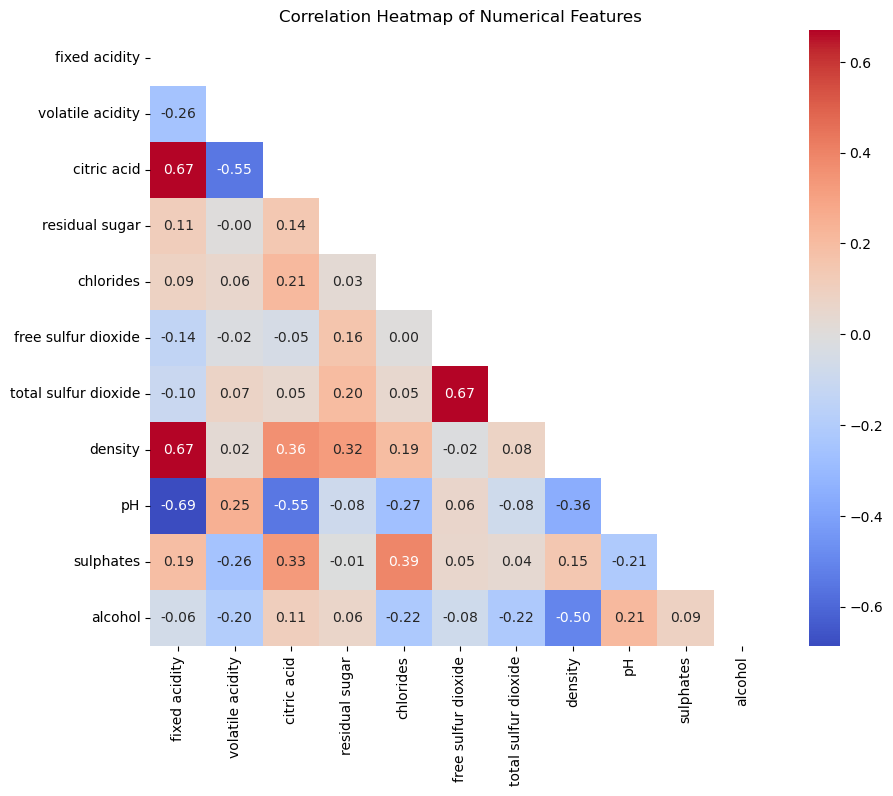

In [85]:

correlations = df.corr()['quality'].sort_values(ascending=False)

# Display significant correlations
significant_correlations = correlations[(correlations > 0.3) | (correlations < -0.3)]
print("\nSignificant Correlations with Quality:\n")
print(significant_correlations)

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(np.ones_like(df[numerical_cols].corr(), dtype=bool)))
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 2.2 Feature Chi-Square Test for Categorical Variables (if any exist)

In [87]:
categorical_cols = df.select_dtypes(include=['object']).columns
chi_square_results = {}

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['quality'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = p

# Display results
chi_square_results = pd.DataFrame(list(chi_square_results.items()), columns=['Variable', 'P-Value'])
chi_square_results['Significant'] = chi_square_results['P-Value'] < 0.05
print("\nChi-Square Test Results for Categorical Variables:\n")
print(chi_square_results)


Chi-Square Test Results for Categorical Variables:

Empty DataFrame
Columns: [Variable, P-Value, Significant]
Index: []


## 4: Feature Importance Ranking

### 4.1 Combine ANOVA and Correlation results


Feature Importance Ranking:

                           P-Value  Significant  Correlation
Variable                                                    
alcohol               1.515335e-92         True     0.480343
volatile acidity      9.990630e-51         True    -0.395214
total sulfur dioxide  3.039491e-22         True    -0.177855
sulphates             7.591231e-18         True     0.248835
citric acid           1.243349e-15         True     0.228057
density               3.087943e-12         True    -0.184252
chlorides             6.317934e-05         True    -0.130988
fixed acidity         1.016005e-04         True     0.119024
free sulfur dioxide   2.392682e-04         True    -0.050463
pH                    5.878158e-04         True    -0.055245
residual sugar        3.373347e-01        False     0.013640


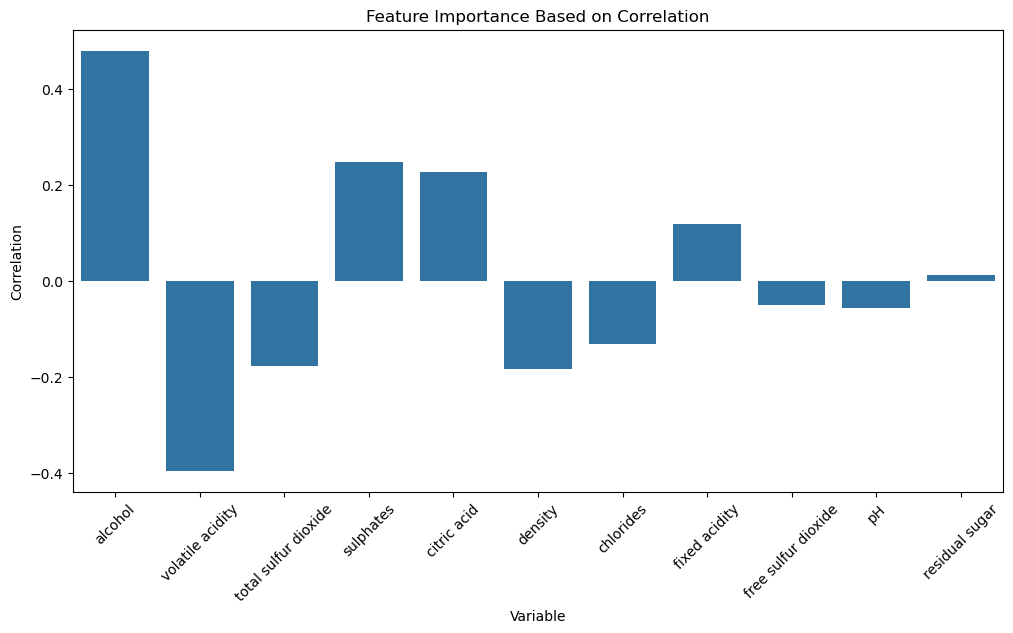

In [90]:
anova_results.set_index('Variable', inplace=True)
feature_importance = anova_results.join(correlations.rename("Correlation"), how='left')
feature_importance.sort_values(by='P-Value', inplace=True)
print("\nFeature Importance Ranking:\n")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Correlation'])
plt.xticks(rotation=45)
plt.title("Feature Importance Based on Correlation")
plt.show()